In [5]:
import pandas as pd
from google.colab import files
import io


uploaded = files.upload()  # Select Au_nanoparticle_dataset.csv

# Get file name and read into DataFrame
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))

# Display first rows
df.head()

Saving Au_nanoparticle_dataset.csv to Au_nanoparticle_dataset (1).csv


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [6]:
desired = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
print("All columns:", list(df.columns))

existing = [c for c in desired if c in df.columns]
if len(existing) != 4:
    print("Warning: missing columns:", set(desired)-set(existing))
new_df = df[existing].copy()
new_df.head()

All columns: ['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Curve_81-90', 'Curve_91-100', 'Curve_101-110', 'Curve_111-120', 'Curve_121-130', 'Curve_131-140', 'Curve_141-150', 'Curve_151-160', 'Curve_161-170', 'Curve_171-180', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'TCN_0', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'TCN_18', 'TCN_19', 'TCN_20', 'BCN_0', 'BCN_1', 'BCN_2', 'BCN_3', 'BCN_4', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'BCN_18', 'BCN_19', 'BCN_20', 'SCN_0', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', '

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


In [7]:
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [8]:
summary = new_df.describe().T[['count','mean','std','25%','50%','75%']]
summary

,count,mean,std,25%,50%,75%
N_total,4000.0,3476.786500,3679.286769,1061.000000,1867.00000,4503.000000
N_bulk,4000.0,2521.550250,2976.232459,618.750000,1199.00000,3183.000000
N_surface,4000.0,955.236250,721.870220,437.000000,666.00000,1301.750000
R_avg,4000.0,20.654363,7.610716,15.160725,18.62925,25.525125


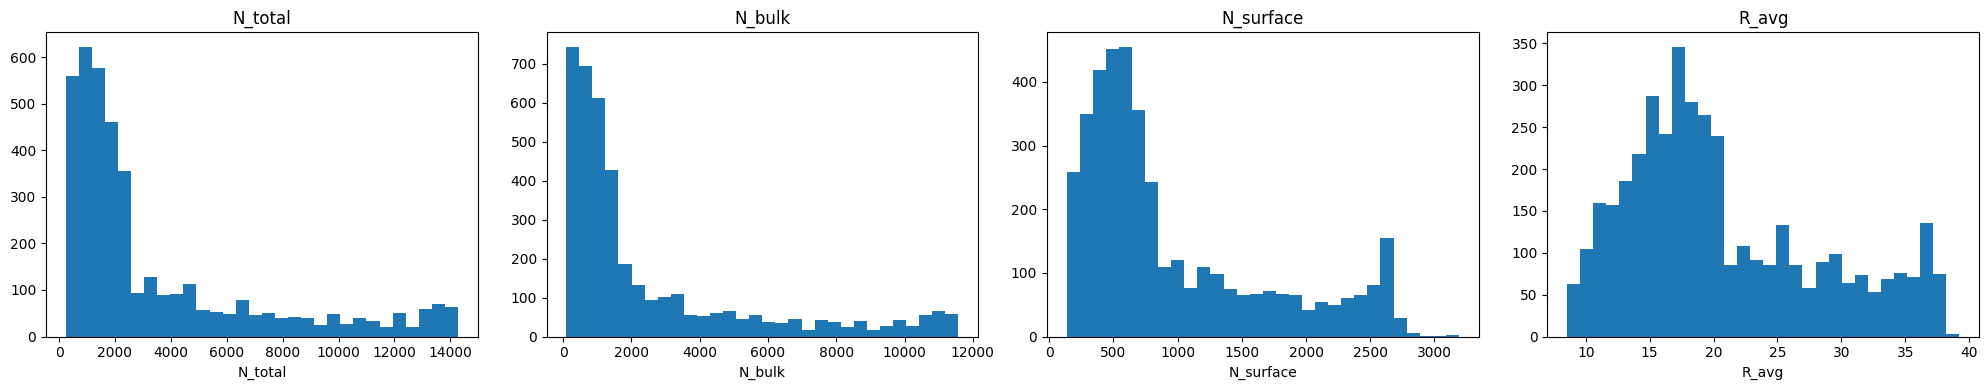

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20,4))
for ax, col in zip(axes, new_df.columns):
    ax.hist(new_df[col].dropna(), bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

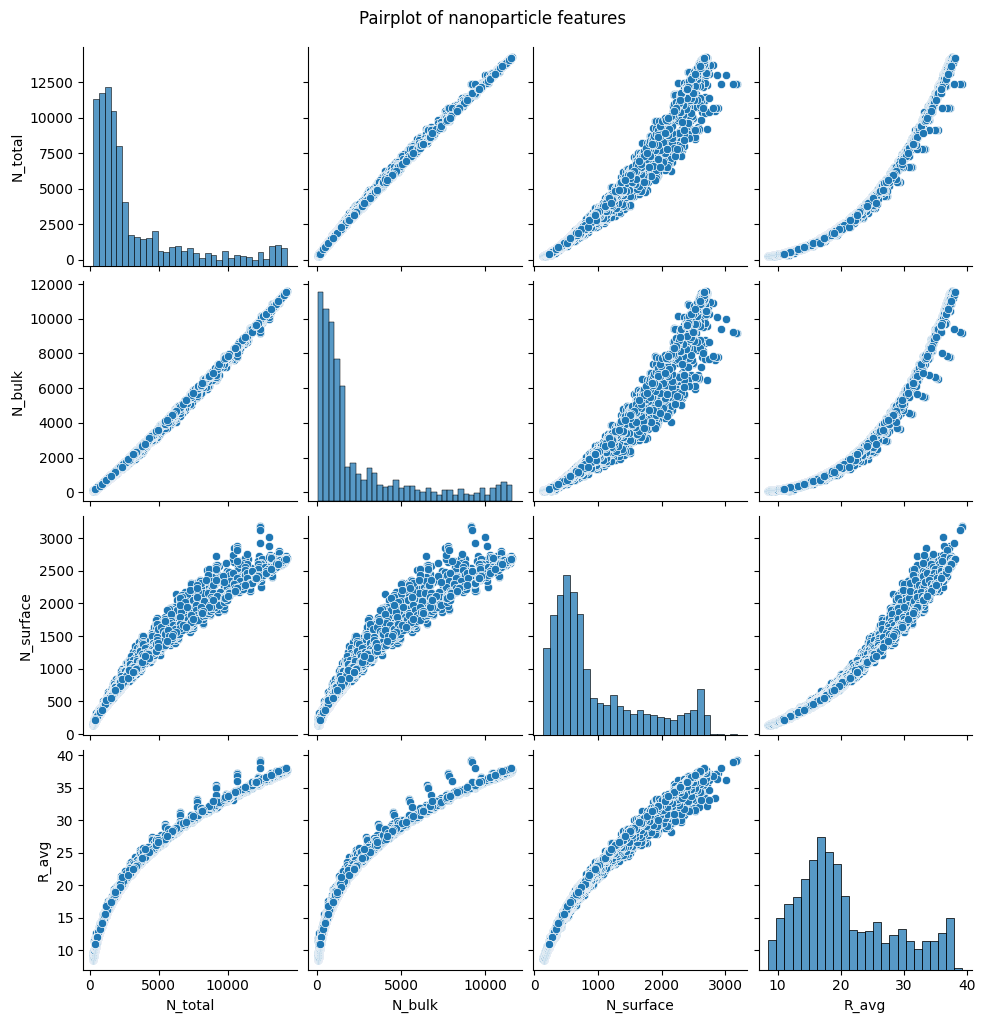

In [12]:
import seaborn as sns

sns.pairplot(new_df)
plt.suptitle("Pairplot of nanoparticle features", y=1.02)
plt.show()

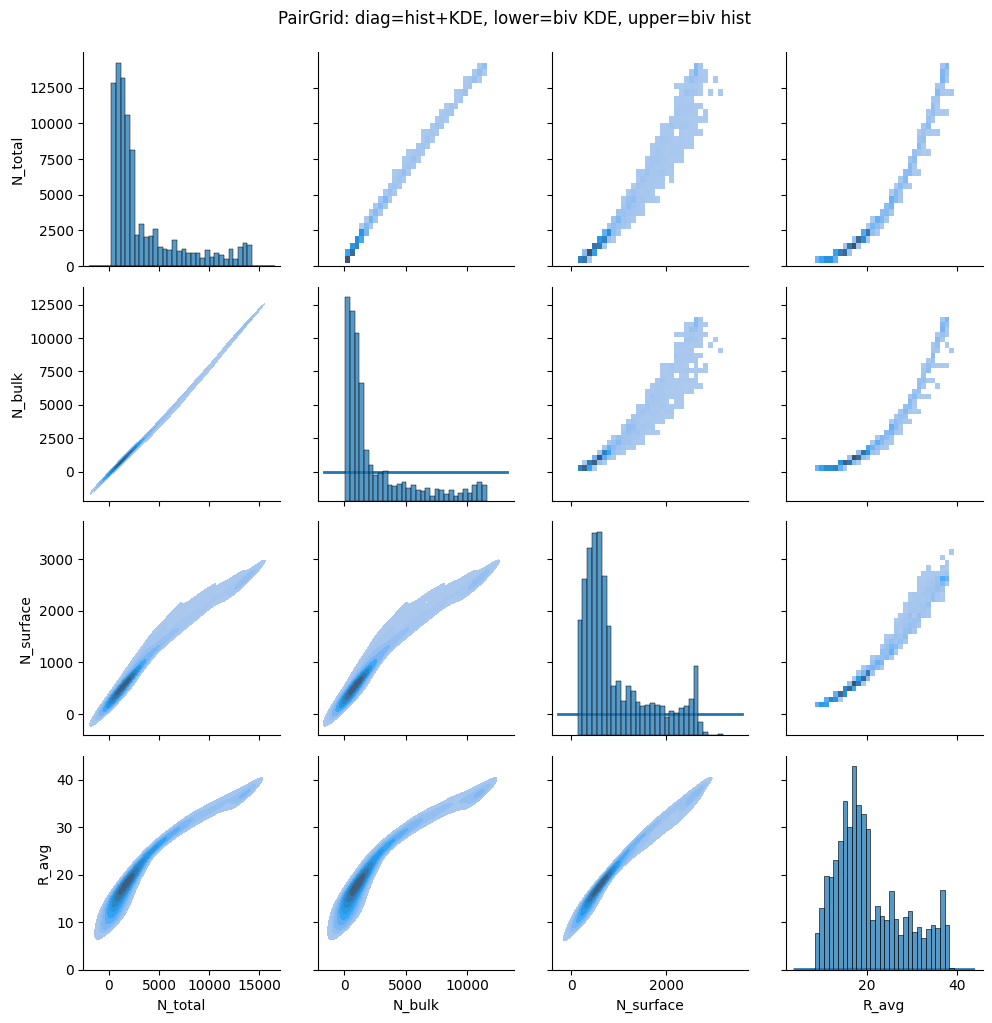

In [13]:
g = sns.PairGrid(new_df, diag_sharey=False)
g.map_upper(sns.histplot, bins=30)                # upper = bivariate histogram
g.map_lower(sns.kdeplot, fill=True, thresh=0.05) # lower = filled bivariate KDE
g.map_diag(sns.histplot, bins=30, kde=False)     # diagonal = hist


for i, col in enumerate(new_df.columns):
    ax = g.axes[i, i]
    sns.kdeplot(new_df[col].dropna(), ax=ax, lw=2)

plt.suptitle("PairGrid: diag=hist+KDE, lower=biv KDE, upper=biv hist", y=1.02)
plt.show()